# Dataset Description:
**Context**
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

**Content**
It contains the following 6 fields:

**1. target**: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

**2. ids:** The id of the tweet ( 2087)

**3. date:** the date of the tweet (Sat May 16 23:58:44 UTC 2009)

**4. flag:** The query (lyx). If there is no query, then this value is NO_QUERY.

**5. user:** the user that tweeted (robotickilldozr)

**6. text:** the text of the tweet (Lyx is cool)

In [134]:
import re
import nltk
import random
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D,GlobalAveragePooling1D, Concatenate, Dense, Dropout

from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora

nltk.data.path.append("/kaggle/working/nltk_data/")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Load the dataset

In [2]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


### Data Preprocessing

Remove unnecessary columns

In [3]:
data = df[['text', 'target']]
data

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [4]:
target_2_data = data[data['target'] == 2]

# Check if there are any rows where target is 2
if target_2_data.empty:
    print("No rows with target equal to 2")
else:
    print("Rows with target equal to 2 exist")

No rows with target equal to 2


In [5]:
data.loc[data['target'] == 4, 'target'] = 1
print(data['target'].value_counts())

target
0    800000
1    800000
Name: count, dtype: int64


In [6]:
data

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1


In [7]:
def preprocess(review):
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    
    review_minus_sw = []
    stop_words = stopwords.words('english')
    review = review.split()
    review = [review_minus_sw.append(word) for word in review if word not in stop_words]
    review = ' '.join(review_minus_sw)
    
    lemmatizer = WordNetLemmatizer()
    review = review.split()
    review = [lemmatizer.lemmatize(w) for w in review]
    review = ' '.join(review)
    
    return review

In [8]:
data.loc[:, 'text'] = data['text'].apply(preprocess)

In [9]:
data

,text,target
0,switchfoot http twitpic com zl awww bummer sho...,0
1,upset update facebook texting might cry result...,0
2,kenichan dived many time ball managed save res...,0
3,whole body feel itchy like fire,0
4,nationwideclass behaving mad see,0
...,...,...
1599995,woke school best feeling ever,1
1599996,thewdb com cool hear old walt interview http b...,1
1599997,ready mojo makeover ask detail,1
1599998,happy th birthday boo alll time tupac amaru sh...,1


In [10]:
x = data['text'].values
y = data['target'].values

# Tokenization
max_words = 10000  
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)
x_seq = tokenizer.texts_to_sequences(x)

# Padding sequences
maxlen = 100  
x_pad = pad_sequences(x_seq, maxlen=maxlen)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.2, random_state=42)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1280000, 100)
(320000, 100)
(1280000,)
(320000,)


In [136]:
print(x_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  171    7    4 2029 1137 2226   78  151    2
  651  128]


In [137]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [59]:
word_embeddings = tokenizer.word_index
num_tokens = len(word_embeddings)
print('dataset has %s number of independent tokens' %num_tokens)

dataset has 573668 number of independent tokens


In [60]:
print("Sample from word_embeddings:")
sample = dict(list(word_embeddings.items())[:5])
print(sample)

Sample from word_embeddings:
{'day': 1, 'good': 2, 'get': 3, 'like': 4, 'go': 5}


In [50]:
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

### Model 0

In [122]:
model = Sequential([
        Embedding(vocab_size, embedding_dim),
        Conv1D(2, 3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 182s 9ms/step - accuracy: 0.7487 - loss: 0.5076
Epoch 2/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 181s 9ms/step - accuracy: 0.7765 - loss: 0.4685
Epoch 3/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 179s 9ms/step - accuracy: 0.7817 - loss: 0.4606
Epoch 4/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 180s 9ms/step - accuracy: 0.7838 - loss: 0.4574
Epoch 5/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 180s 9ms/step - accuracy: 0.7856 - loss: 0.4542


In [123]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.3f} %")

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7719 - loss: 0.4748
Test Accuracy: 77.153 %


In [124]:
y_pred = model.predict(x_test)
print(y_pred)

y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
[[0.18452519 0.8154748 ]
 [0.08714634 0.9128537 ]
 [0.69412374 0.3058763 ]
 ...
 [0.08041805 0.919582  ]
 [0.7295189  0.2704811 ]
 [0.8668767  0.13312326]]
[1 1 0 ... 1 0 0]


Text(50.722222222222214, 0.5, 'y_pred')

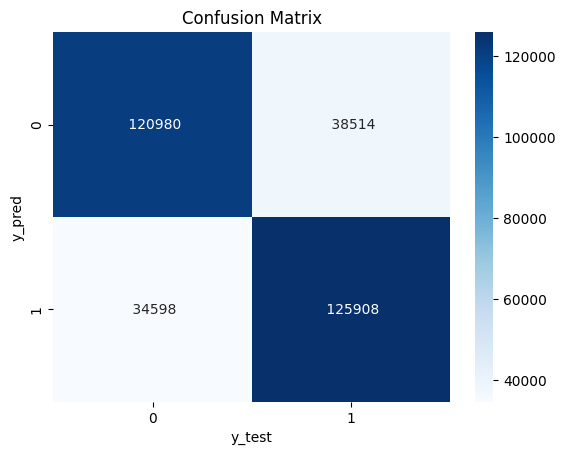

In [125]:
cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77    159494
           1       0.77      0.78      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



### Model 1

In [98]:
model1 = Sequential([
        Embedding(vocab_size, embedding_dim),
        Conv1D(64, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(2, activation='softmax')])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 195s 10ms/step - accuracy: 0.7609 - loss: 0.4882
Epoch 2/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 191s 10ms/step - accuracy: 0.7947 - loss: 0.4373
Epoch 3/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 188s 9ms/step - accuracy: 0.8122 - loss: 0.4093
Epoch 4/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 187s 9ms/step - accuracy: 0.8313 - loss: 0.3768
Epoch 5/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 187s 9ms/step - accuracy: 0.8485 - loss: 0.3453


In [99]:
loss1, accuracy1 = model1.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy1*100:.3f} %")

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7708 - loss: 0.4999
Test Accuracy: 77.052 %


In [101]:
y_pred1 = model1.predict(x_test)
print(y_pred1)
print()
y_pred1 = np.argmax(y_pred1, axis=1)
print(y_pred1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
[[0.29294893 0.7070511 ]
 [0.04804659 0.9519535 ]
 [0.03930983 0.96069014]
 ...
 [0.0063834  0.9936166 ]
 [0.22047298 0.779527  ]
 [0.9464529  0.05354705]]

[1 1 1 ... 1 1 0]


Text(50.722222222222214, 0.5, 'y_pred')

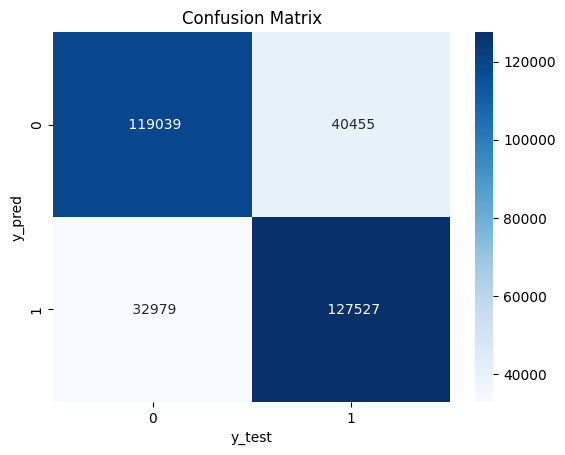

In [102]:
cm1 = confusion_matrix(y_test,y_pred1)
ax = sns.heatmap(cm1, annot=True, cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [103]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76    159494
           1       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



### Model 2

In [104]:
model2 = Sequential([
        Embedding(vocab_size, embedding_dim),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(2, activation='softmax')])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 196s 10ms/step - accuracy: 0.7624 - loss: 0.4873
Epoch 2/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 192s 10ms/step - accuracy: 0.7948 - loss: 0.4371
Epoch 3/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 192s 10ms/step - accuracy: 0.8124 - loss: 0.4087
Epoch 4/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 192s 10ms/step - accuracy: 0.8313 - loss: 0.3762
Epoch 5/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 192s 10ms/step - accuracy: 0.8493 - loss: 0.3440


In [105]:
loss2, accuracy2 = model2.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy2*100:.3f} %")

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7729 - loss: 0.4994
Test Accuracy: 77.188 %


In [106]:
y_pred2 = model2.predict(x_test)
print(y_pred2)
print()
y_pred2 = np.argmax(y_pred2, axis=1)
print(y_pred2)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
[[0.7663179  0.23368214]
 [0.04366608 0.9563339 ]
 [0.58142024 0.4185798 ]
 ...
 [0.02891156 0.97108847]
 [0.48747048 0.5125295 ]
 [0.9159025  0.08409747]]

[0 1 0 ... 1 1 0]


Text(50.722222222222214, 0.5, 'y_pred')

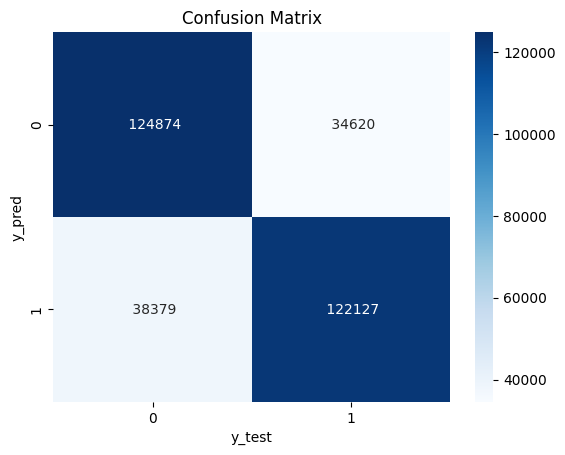

In [107]:
cm2 = confusion_matrix(y_test,y_pred2)
ax = sns.heatmap(cm2, annot=True, cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [108]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77    159494
           1       0.78      0.76      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



### Model 3

In [116]:
model3 = Sequential([
        Embedding(vocab_size, embedding_dim),
        Conv1D(128, 5, activation='relu'),
        GlobalAveragePooling1D(),
        Dense(2, activation='softmax')])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 196s 10ms/step - accuracy: 0.7520 - loss: 0.5007
Epoch 2/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 194s 10ms/step - accuracy: 0.7884 - loss: 0.4496
Epoch 3/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 194s 10ms/step - accuracy: 0.7967 - loss: 0.4350
Epoch 4/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 193s 10ms/step - accuracy: 0.8050 - loss: 0.4208
Epoch 5/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 193s 10ms/step - accuracy: 0.8136 - loss: 0.4066


In [117]:
loss3, accuracy3 = model3.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy3*100:.3f} %")

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7812 - loss: 0.4645
Test Accuracy: 78.086 %


In [118]:
y_pred3 = model3.predict(x_test)
print(y_pred3)

y_pred3 = np.argmax(y_pred3, axis=1)
print(y_pred3)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
[[0.32339385 0.6766062 ]
 [0.05995425 0.9400457 ]
 [0.15345618 0.8465438 ]
 ...
 [0.0250326  0.9749674 ]
 [0.7206522  0.2793478 ]
 [0.9001585  0.09984142]]
[1 1 1 ... 1 0 0]


Text(50.722222222222214, 0.5, 'y_pred')

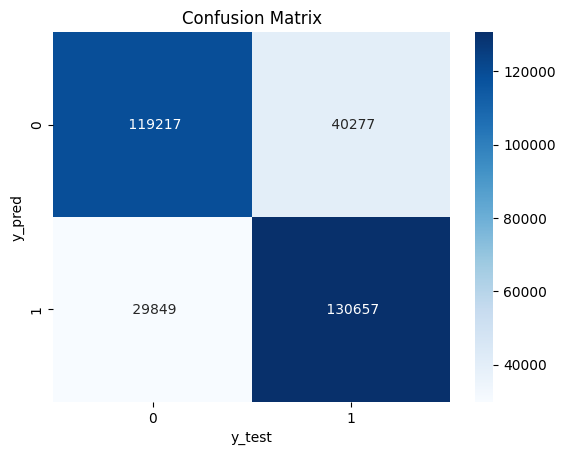

In [119]:
cm3 = confusion_matrix(y_test,y_pred3)
ax = sns.heatmap(cm3, annot=True, cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [120]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77    159494
           1       0.76      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



### Model 4

In [138]:
filter_sizes = [3, 4, 5]
num_filters = 2
dropout_rate = 0.5

input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_dim)(input_layer)
conv_blocks = []

for filter_size in filter_sizes:
    conv = Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu')(embedding_layer)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

concat = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
concat_dropout = Dropout(dropout_rate)(concat)
output_layer = Dense(2, activation='softmax')(concat_dropout)

model4 = Model(inputs=input_layer, outputs=output_layer)
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 203s 10ms/step - accuracy: 0.6994 - loss: 0.5766
Epoch 2/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 200s 10ms/step - accuracy: 0.7253 - loss: 0.5513
Epoch 3/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 199s 10ms/step - accuracy: 0.7289 - loss: 0.5470
Epoch 4/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 200s 10ms/step - accuracy: 0.7312 - loss: 0.5429
Epoch 5/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 200s 10ms/step - accuracy: 0.7324 - loss: 0.5410


In [139]:
loss4, accuracy4 = model4.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy4*100:.3f} %")

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7606 - loss: 0.4980
Test Accuracy: 76.092 %


In [140]:
y_pred4 = model4.predict(x_test)
print(y_pred4)

y_pred4 = np.argmax(y_pred4, axis=1)
print(y_pred4)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
[[0.17033479 0.82966524]
 [0.21988057 0.7801194 ]
 [0.33380017 0.6661998 ]
 ...
 [0.09933707 0.90066296]
 [0.7929876  0.20701247]
 [0.7564399  0.24356006]]
[1 1 1 ... 1 0 0]


Text(50.722222222222214, 0.5, 'y_pred')

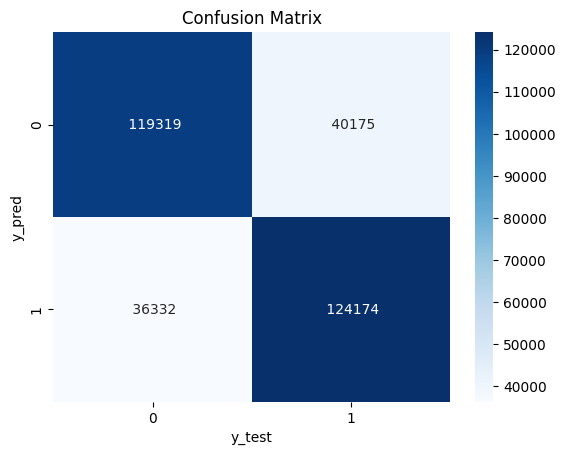

In [141]:
cm4 = confusion_matrix(y_test,y_pred4)
ax = sns.heatmap(cm4, annot=True, cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [142]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76    159494
           1       0.76      0.77      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

